In [ ]:
# import necesaary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, precision_recall_curve
)

In [32]:
#Reading the data
df = pd.read_csv("logistic_regression.csv")

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [34]:
#shape of the data
print("no of rows:", df.shape[0])
print("no of columns:", df.shape[1])

no of rows: 396030
no of columns: 27


In [35]:
#checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [36]:
# statistical summary
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [37]:
#checking unique values
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [38]:
#Checking missing values in % 
100*df.isna().sum()/df.shape[0]

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Checking outliers on Loan Amount column as it will be high;y related to Loan Status column

In [39]:
s_25 = np.quantile(df['loan_amnt'],0.25)
s_75 = np.quantile(df['loan_amnt'],0.75)
iqr = s_75-s_25
s_lower = max(s_25 - 1.5*iqr, df['loan_amnt'].min())
s_upper = min(s_75 + 1.5*iqr, df['loan_amnt'].max())

In [40]:
df = df[ (df['loan_amnt']>=s_lower) & (df['loan_amnt']<=s_upper)]
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [41]:
df.shape

(395839, 27)

Target Variable

In [42]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Data Analysis & Visuallisation

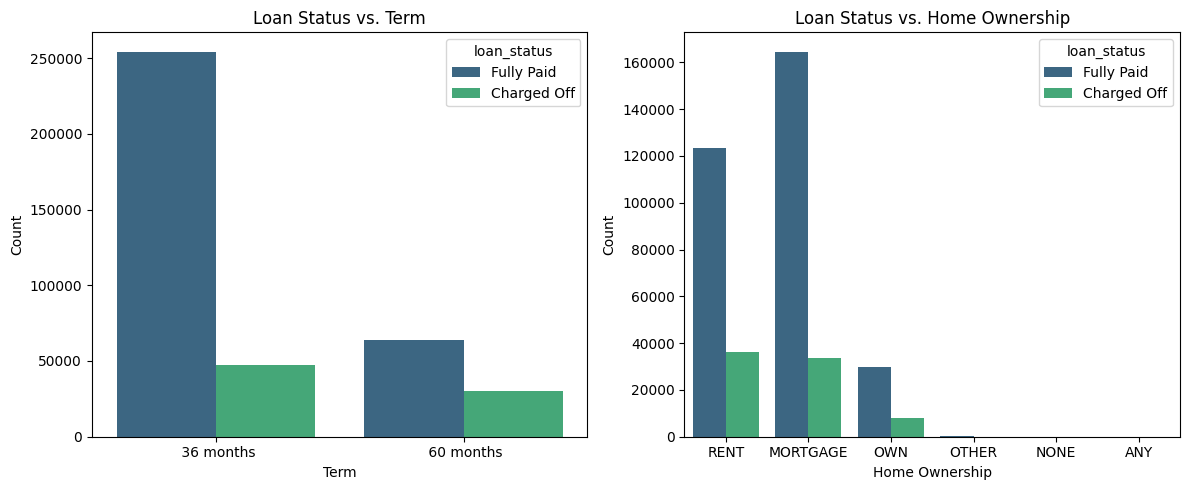

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x='term', hue='loan_status', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Loan Status vs. Term')
axes[0].set_xlabel('Term')
axes[0].set_ylabel('Count')

sns.countplot(x='home_ownership', hue='loan_status', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Loan Status vs. Home Ownership')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

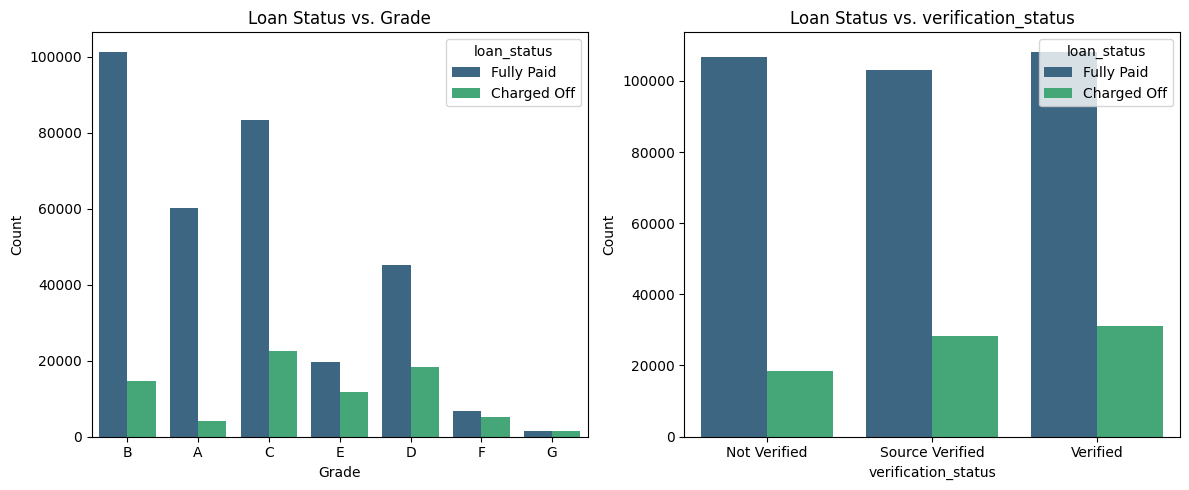

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x='grade', hue='loan_status', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Loan Status vs. Grade')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')

sns.countplot(x='verification_status', hue='loan_status', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Loan Status vs. verification_status')
axes[1].set_xlabel('verification_status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

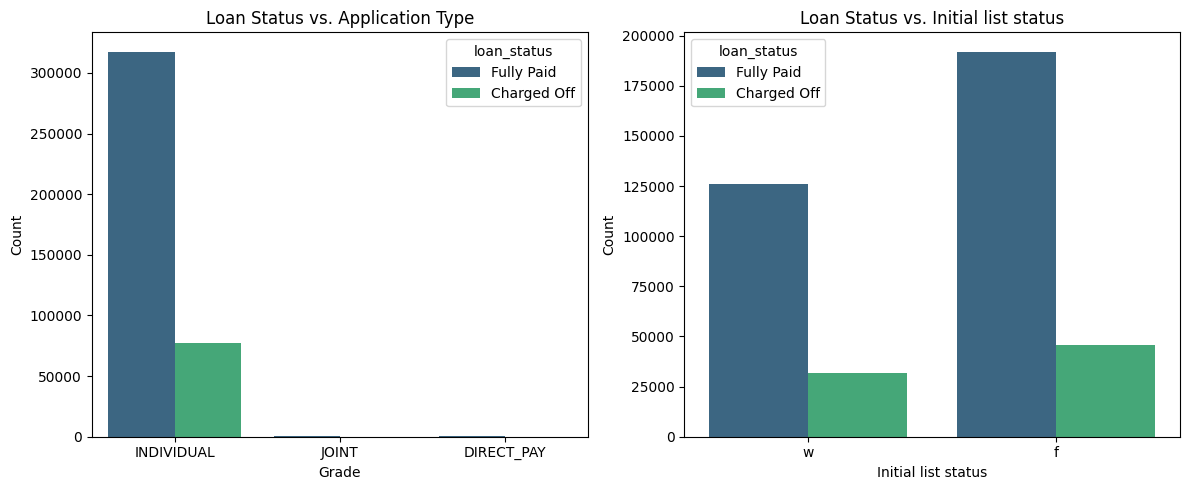

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x='application_type', hue='loan_status', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Loan Status vs. Application Type')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')

sns.countplot(x='initial_list_status', hue='loan_status', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Loan Status vs. Initial list status')
axes[1].set_xlabel('Initial list status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

NPAs (Non Performing Assets):
- We can notice that Grade E, F and G are not performing well
- Application types like Join and Direct Pay are not performing well

Feature Engineering

In [46]:
import warnings
category_mapping = {'Fully Paid': 0, 'Charged Off': 1}

# Suppress FutureWarning temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df['loan_status'] = df['loan_status'].replace(category_mapping)

In [47]:
df['loan_status'].unique()

array([0, 1])

In [48]:
# Create flags for each specified column 
def create_flag(value):
    return 1 if value > 1.0 else 0

df['pub_rec_flag'] = df['pub_rec'].apply(create_flag)
df['mort_acc_flag'] = df['mort_acc'].apply(create_flag)
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(create_flag)

1. Fetching data from term columns:

In [49]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [50]:
df['term'] = df['term'].astype(str).str.extract('(\d+)').astype(float).astype('Int64')

2. Using Target Encoding for Labeled data

In [51]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
df['grade'] = encoder.fit_transform(X=df['grade'],y=df['loan_status'])

In [52]:
df['sub_grade'] = encoder.fit_transform(X=df['sub_grade'],y=df['loan_status'])

3. Handling Missing values

In [53]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [54]:
from sklearn.impute import SimpleImputer

a = SimpleImputer(strategy='most_frequent')
missing=['emp_length','emp_title','title','revol_util','mort_acc','pub_rec_bankruptcies']
for column in missing:
    df[column] = pd.DataFrame(a.fit_transform(pd.DataFrame(df[column])))

In [55]:
df.isna().sum()*100/df.shape[0]

loan_amnt                    0.000000
term                         0.000000
int_rate                     0.000000
installment                  0.000000
grade                        0.000000
sub_grade                    0.000000
emp_title                    0.048252
emp_length                   0.048252
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
issue_d                      0.000000
loan_status                  0.000000
purpose                      0.000000
title                        0.048252
dti                          0.000000
earliest_cr_line             0.000000
open_acc                     0.000000
pub_rec                      0.000000
revol_bal                    0.000000
revol_util                   0.048252
total_acc                    0.000000
initial_list_status          0.000000
application_type             0.000000
mort_acc                     0.048252
pub_rec_bankruptcies         0.048252
address     

In [56]:
df['emp_length'] = encoder.fit_transform(X=df['emp_length'],y=df['loan_status'])
df['emp_title'] = encoder.fit_transform(X=df['emp_title'],y=df['loan_status'])
df['title'] = encoder.fit_transform(X=df['title'],y=df['loan_status'])
df['home_ownership'] = encoder.fit_transform(X=df['home_ownership'],y=df['loan_status'])
df['application_type'] = encoder.fit_transform(X=df['application_type'],y=df['loan_status'])

In [57]:
df.drop('address',axis=1,inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
0,10000.0,36,11.44,329.48,0.125774,0.138447,0.078770,0.195955,0.226646,117000.0,...,36369.0,41.8,25.0,w,0.196158,0.0,0.0,0,0,0
1,8000.0,36,11.99,265.68,0.125774,0.155115,0.165895,0.196540,0.169656,65000.0,...,20131.0,53.3,27.0,f,0.196158,3.0,0.0,0,1,0
2,15600.0,36,10.49,506.97,0.125774,0.123367,0.139489,0.201104,0.226646,43057.0,...,11987.0,92.2,26.0,f,0.196158,0.0,0.0,0,0,0
3,7200.0,36,6.49,220.65,0.062884,0.048107,0.170674,0.194430,0.226646,54000.0,...,5472.0,21.5,13.0,f,0.196158,0.0,0.0,0,0,0
4,24375.0,60,17.27,609.33,0.211910,0.245228,0.300782,0.198798,0.169656,55000.0,...,24584.0,69.8,43.0,f,0.196158,1.0,0.0,0,0,0


In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'pub_rec_flag', 'mort_acc_flag',
       'pub_rec_bankruptcies_flag'],
      dtype='object')

In [59]:
df['earliest_cr_line'] = encoder.fit_transform(X=df['earliest_cr_line'],y=df['loan_status'])

In [60]:
df[['verification_status','issue_d','purpose','initial_list_status']]

,verification_status,issue_d,purpose,initial_list_status
0,Not Verified,Jan-2015,vacation,w
1,Not Verified,Jan-2015,debt_consolidation,f
2,Source Verified,Jan-2015,credit_card,f
3,Not Verified,Nov-2014,credit_card,f
4,Verified,Apr-2013,credit_card,f
...,...,...,...,...
396025,Source Verified,Oct-2015,debt_consolidation,w
396026,Source Verified,Feb-2015,debt_consolidation,f
396027,Verified,Oct-2013,debt_consolidation,f
396028,Verified,Aug-2012,debt_consolidation,f


In [61]:
df['verification_status'] = encoder.fit_transform(X=df['verification_status'],y=df['loan_status'])
df['issue_d'] = encoder.fit_transform(X=df['issue_d'],y=df['loan_status'])
df['purpose'] = encoder.fit_transform(X=df['purpose'],y=df['loan_status'])
df['initial_list_status'] = encoder.fit_transform(X=df['initial_list_status'],y=df['loan_status'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395839 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  395839 non-null  float64
 1   term                       395839 non-null  Int64  
 2   int_rate                   395839 non-null  float64
 3   installment                395839 non-null  float64
 4   grade                      395839 non-null  float64
 5   sub_grade                  395839 non-null  float64
 6   emp_title                  395839 non-null  float64
 7   emp_length                 395839 non-null  float64
 8   home_ownership             395839 non-null  float64
 9   annual_inc                 395839 non-null  float64
 10  verification_status        395839 non-null  float64
 11  issue_d                    395839 non-null  float64
 12  loan_status                395839 non-null  int64  
 13  purpose                    395839 

Correlation between Columns

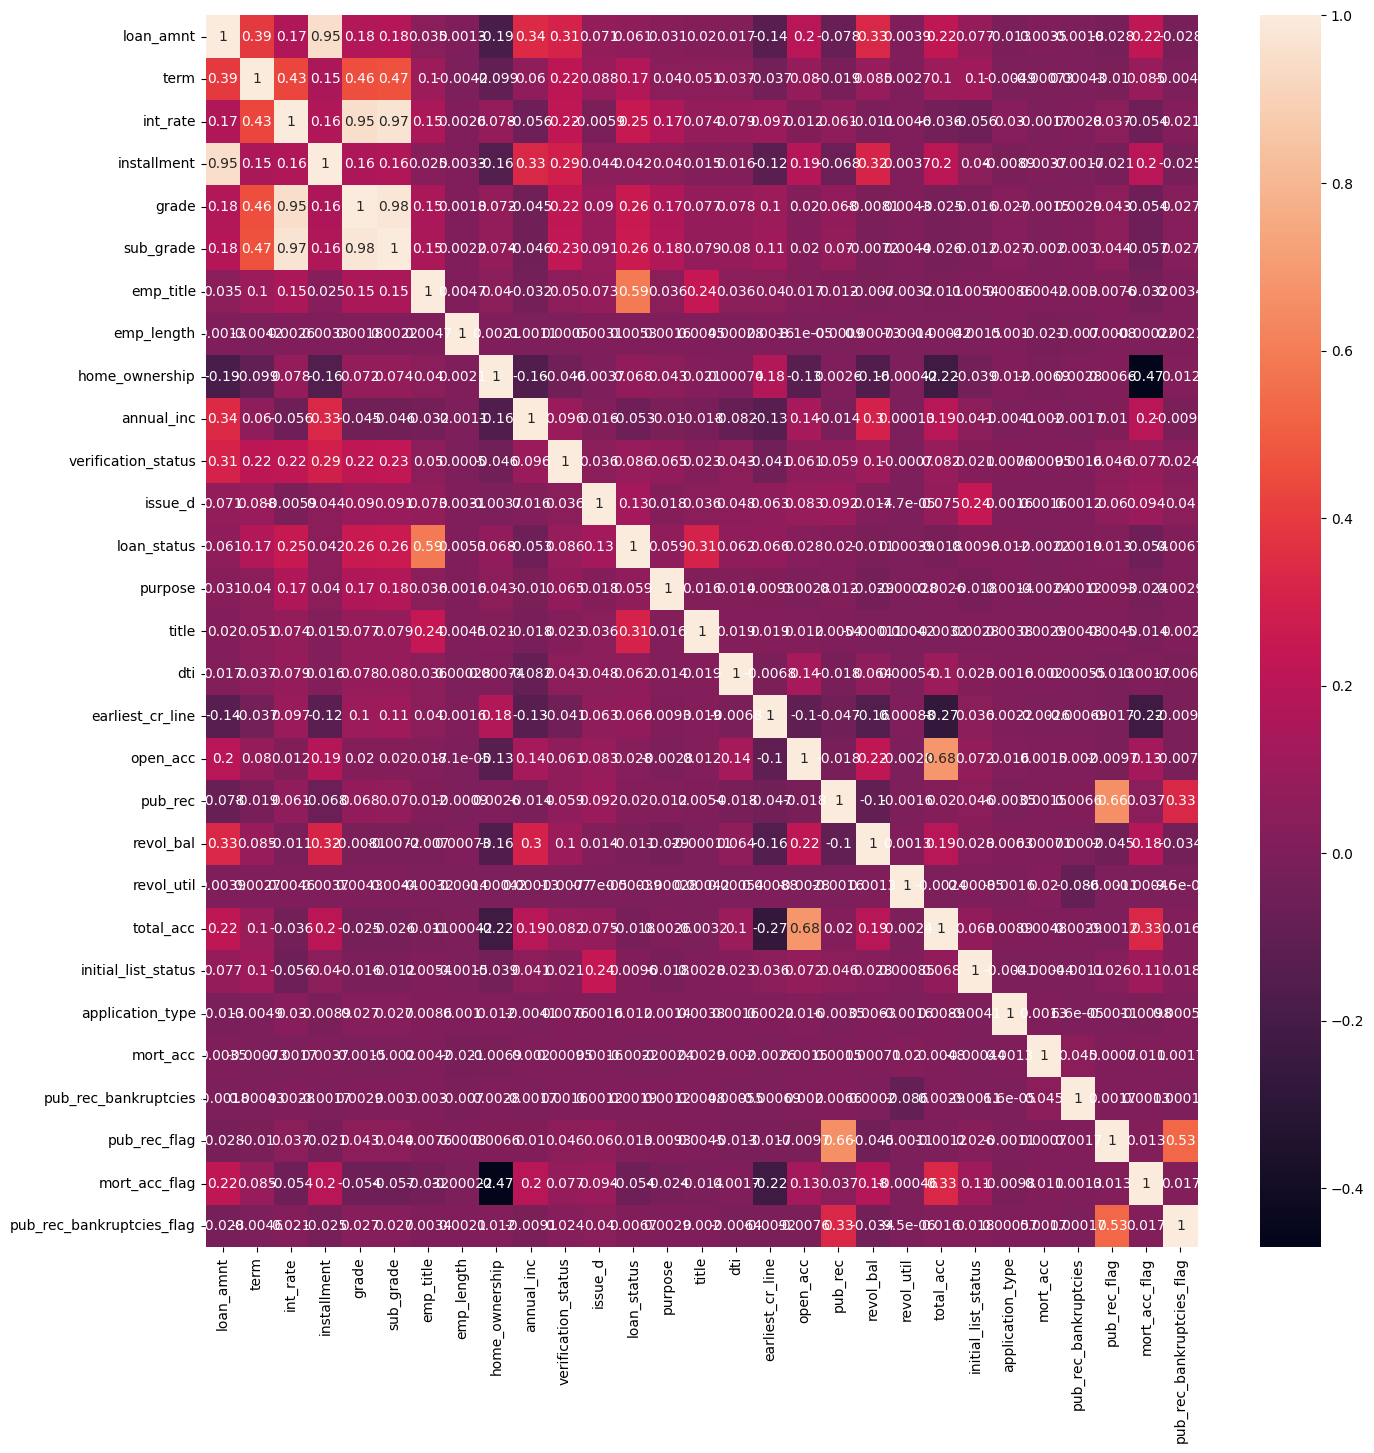

In [63]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

Independent and Dependent variable split

In [64]:
df.dropna(inplace=True)
X = df.drop('loan_status',axis=1)
y=df['loan_status']

Logistic Regression

1. Without Assumptions

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
model = LogisticRegression()

2. Train and Test Split of Data

In [66]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [68]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
y_test_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)

3. Accuracy of Model

In [70]:
print('*'*36)
print('Accuracy of Model:',accuracy)
print('*'*36)

************************************
Accuracy of Model: 0.8866043220017692
************************************


In [71]:
def acc(y_test,y_pred):
    return np.sum(y_test==y_pred)/len(y_test)

acc(y_test,y_test_pred)

np.float64(0.8866043220017692)

4. Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     63541
           1       0.79      0.57      0.67     15589

    accuracy                           0.89     79130
   macro avg       0.85      0.77      0.80     79130
weighted avg       0.88      0.89      0.88     79130



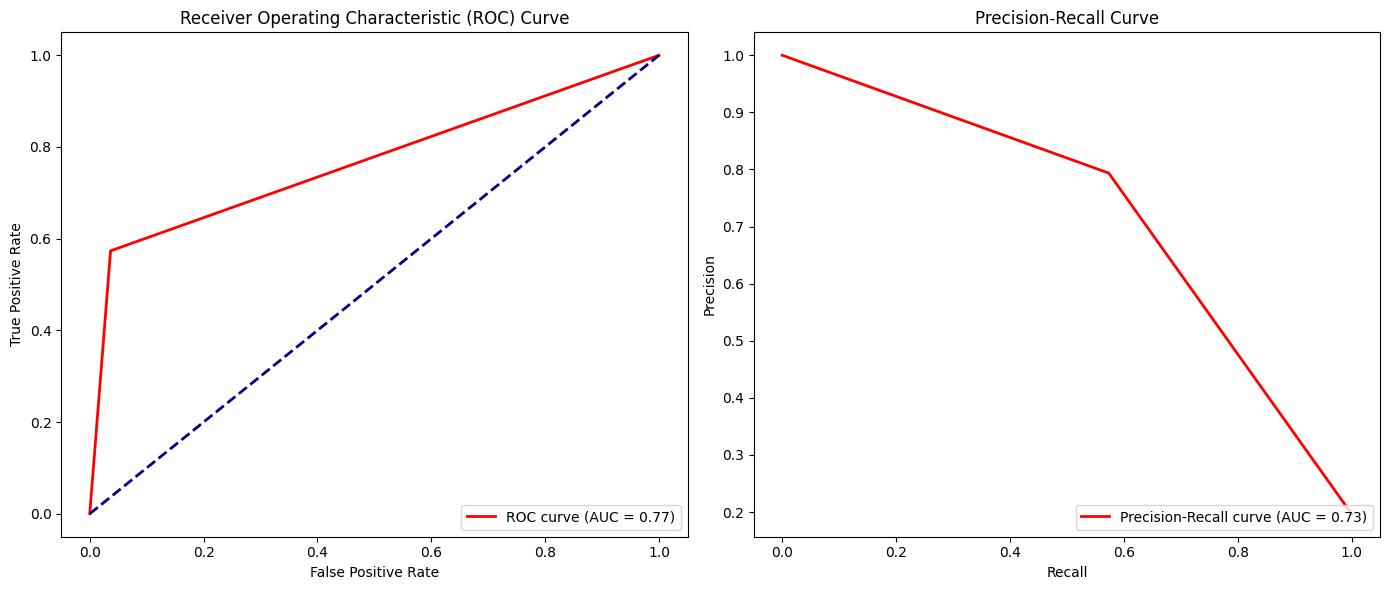

In [72]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
import matplotlib.pyplot as plt


# 1. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# 2. ROC AUC Curve
roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# ROC AUC Curve
axes[0].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc="lower right")

# Precision-Recall Curve
axes[1].plot(recall, precision, color='red', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

Interpretation:
90% of the instances predicted as class 0 were actually class 0, and 79% of the instances predicted as class 1 were actually class 1.
96% of the actual instances of class 0 were correctly predicted as class 0, but only 57% of the actual instances of class 1 were correctly predicted as class 1.
F1-score balances precision and recall. A higher F1-score indicates a better balance between precision and recall.
Overall accuracy is 0.89, meaning that the model correctly predicted the target variable in approximately 89% of the instances.
Weighted Avg precision is 0.88, recall is 0.89, and F1-score is 0.88

5. Model Performance Improvement

Regularization

In [73]:
c = np.logspace(-3, 3, 7)

In [74]:
r2_score=[]
for i in c:
    lgr = LogisticRegression(penalty='l2',random_state=42, C=i)
    lgr.fit(X_train,y_train)
    y_pred = lgr.predict(X_test)
    r2_score.append(acc(y_test,y_pred))
    print(i,acc(y_test,y_pred))

0.001 0.8877796031846329
0.01 0.886680146594212
0.1 0.8865916845696954
1.0 0.8866043220017692
10.0 0.8866043220017692
100.0 0.8866043220017692
1000.0 0.8866043220017692


In [75]:
model = LogisticRegression(C=0.001)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

We notice a improvement in model at C = 0.001

Checking Confusion Matrix

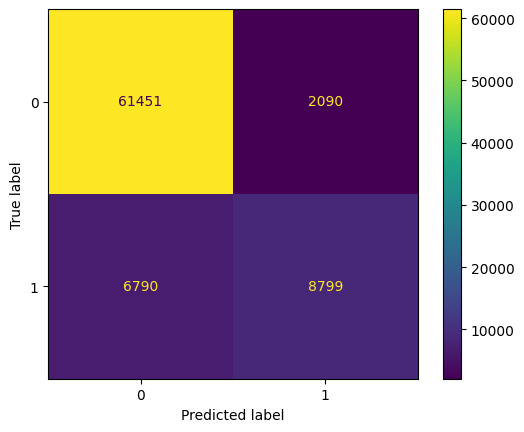

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred))
disp.plot()
plt.show()

In [77]:
tp = 8800
tn = 61451
fp = 6789
fn = 2090
p=tp*100/(tp+fp)
print('Precision:',tp*100/(tp+fp),'%')

Precision: 56.45006094040669 %


Accuracy Score

In [78]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_test_pred)*100

88.77796031846329

Using Grid Search Method for Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000], 'penalty':['l2']}
logreg = LogisticRegression()

# Using K-fold method with k=5
grid_search = GridSearchCV(logreg, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train,y_train)

print('Best Hyperparameters:',grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
print('*'*50)
print('Accuracy:',round(acc(y_test,y_pred_test)*100,2),'%')

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
**************************************************
Accuracy: 88.78 %


Final Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     63541
           1       0.81      0.56      0.66     15589

    accuracy                           0.89     79130
   macro avg       0.85      0.77      0.80     79130
weighted avg       0.88      0.89      0.88     79130



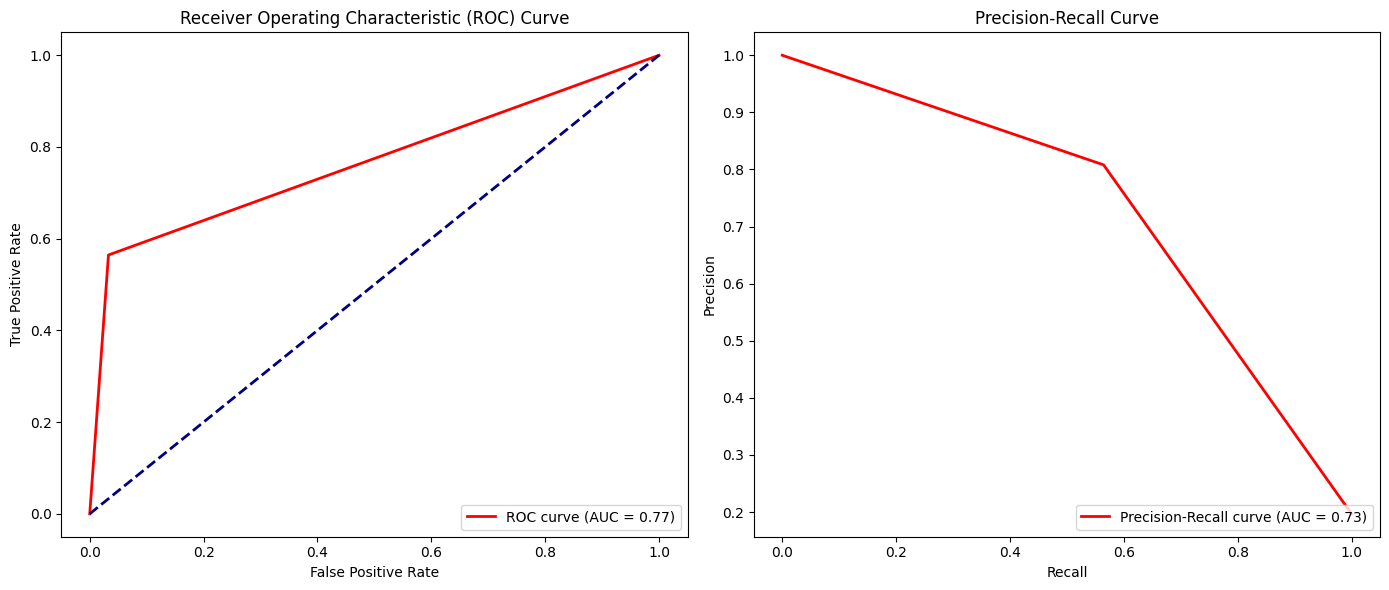

In [80]:
# 1. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# 2. ROC AUC Curve
roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_test)

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# ROC AUC Curve
axes[0].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc="lower right")

# Precision-Recall Curve
axes[1].plot(recall, precision, color='red', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

Insights and Recommendations:
1. Model Performance Metrics:
Accuracy: Achieved an overall accuracy of 89% indicating the model's ability to correctly classify instances.

2. Classification Report Analysis:
Class 0 (Non-Defaulters): High precision (90%) and recall (97%). Demonstrates reliable identification of non-defaulters, minimizing false negatives.

- Class 1 (Defaulters): Precision at 81%, indicating areas for improvement in avoiding false positives. Recall at 56%, suggesting the need to capture more instances of actual defaulters.